1. We will collect the Stock data-- AAPL
2. Preprocess the Data- Train and Test
3. Create a Stacked LSTM Model
4. Predict the test data and plot the output

In [1]:
### Data Collection
import pandas_datareader as pdr

In [2]:
key = ""

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-09-12 00:00:00+00:00,160.86,163.96,158.770,162.61,71139119,38.164573,38.900058,37.668713,38.579766,284556476,0.0,1.0
1,AAPL,2017-09-13 00:00:00+00:00,159.65,159.96,157.910,159.87,44393752,37.877496,37.951045,37.464675,37.929692,177575008,0.0,1.0
2,AAPL,2017-09-14 00:00:00+00:00,158.28,159.40,158.090,158.99,23073646,37.552459,37.818183,37.507381,37.720909,92294584,0.0,1.0
3,AAPL,2017-09-15 00:00:00+00:00,159.88,160.97,158.000,158.47,48203642,37.932064,38.190671,37.486028,37.597537,192814568,0.0,1.0
4,AAPL,2017-09-18 00:00:00+00:00,158.67,160.50,157.995,160.11,27939718,37.644988,38.079162,37.484842,37.986633,111758872,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-09-02 00:00:00+00:00,155.81,160.362,154.965,159.750,76957768,155.81,160.362,154.965,159.750,76957768,0.0,1.0
1254,AAPL,2022-09-06 00:00:00+00:00,154.53,157.090,153.690,156.470,73295539,154.53,157.090,153.690,156.470,73295539,0.0,1.0
1255,AAPL,2022-09-07 00:00:00+00:00,155.96,156.670,153.610,154.825,87449574,155.96,156.670,153.610,154.825,87449574,0.0,1.0
1256,AAPL,2022-09-08 00:00:00+00:00,154.46,156.360,152.680,154.640,84923847,154.46,156.360,152.680,154.640,84923847,0.0,1.0
1257,AAPL,2022-09-09 00:00:00+00:00,157.37,157.820,154.750,155.470,68081006,157.37,157.820,154.750,155.470,68081006,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1

0       160.86
1       159.65
2       158.28
3       159.88
4       158.67
         ...  
1253    155.81
1254    154.53
1255    155.96
1256    154.46
1257    157.37
Name: close, Length: 1258, dtype: float64

In [10]:
df1.shape

(1258,)

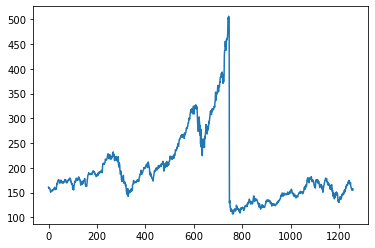

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

LSTMs are highly sensitive to the scale of the data, so we will apply MIN-MAX scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.13530369],
       [0.13227301],
       [0.12884158],
       ...,
       [0.12303068],
       [0.11927364],
       [0.1265623 ]])

In [16]:
df1.shape

(1258, 1)

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(817, 441)

In [19]:
len(train_data), len(test_data)

(817, 441)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
X_train

array([[[0.13530369],
        [0.13227301],
        [0.12884158],
        ...,
        [0.15175955],
        [0.15263619],
        [0.134402  ]],

       [[0.13227301],
        [0.12884158],
        [0.13284909],
        ...,
        [0.15263619],
        [0.134402  ],
        [0.12435817]],

       [[0.12884158],
        [0.13284909],
        [0.12981841],
        ...,
        [0.134402  ],
        [0.12435817],
        [0.14073889]],

       ...,

       [[0.70479649],
        [0.71148403],
        [0.69943644],
        ...,
        [0.03058234],
        [0.03977458],
        [0.04067627]],

       [[0.71148403],
        [0.69943644],
        [0.69748278],
        ...,
        [0.03977458],
        [0.04067627],
        [0.04032561]],

       [[0.69943644],
        [0.69748278],
        [0.71782091],
        ...,
        [0.04067627],
        [0.04032561],
        [0.03859737]]])

In [26]:
### Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data = (X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 366ms/step - loss: 0.0436 - val_loss: 0.0027
Epoch 2/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0147 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0113 - val_loss: 0.0012
Epoch 4/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0097 - val_loss: 5.1481e-04
Epoch 5/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0091 - val_loss: 3.5514e-04
Epoch 6/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0085 - val_loss: 2.9480e-04
Epoch 7/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0073 - val_loss: 2.9461e-04
Epoch 8/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0064 - val_loss: 4.9497e-04
Epoch 9/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0057 - val_loss: 3.1341e-04
Epoch 10/100
12/12 [==============================] - 3s 231ms/ste

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 40ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
math.sqrt(mean_squared_error(y_train,train_predict))

230.7467308850019

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

150.64244700479014

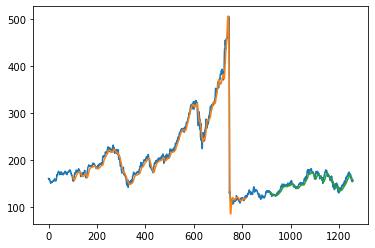

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()